<a href="https://colab.research.google.com/github/tpgall1996/machine_learning_course/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 4: Convolutional Neural Networks**
___

We're going to train a Convolutional Neural Network to classify images from the CIFAR10 dataset. 

First let's do the usual importing of libraries and downloading of data. 

Some inspiration taken from http://parneetk.github.io/blog/cnn-cifar10/

In [1]:
import numpy as np
import scipy 
from matplotlib import pyplot as plt
import keras
keras.backend.set_image_dim_ordering('th')

Using TensorFlow backend.


The last line here just ensures that our data will arrive in a nice format that's easy to understand. (It specifies the ordering of the array dimensions for each image). 

Now let's import the layers we need. We'll be making use of 2d convolutional layers, (max) pooling layers, activation functions, dropouts, standard 'dense' layers from last time, and we'll need to flatten the array for input into the fully connected network at the end. 

This decreases training time and can improve accuracy. 

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Dense, Flatten

Now let's load in the dataset, in the usual way. 

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [24]:
np.shape(x_train[0])

(3, 32, 32)

Let's have a look at some example images

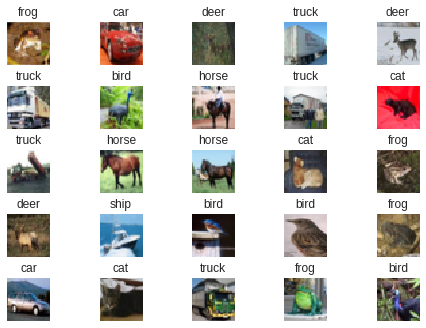

In [5]:
N=5
start_val = 0# pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = ['aeroplane','car','bird','cat','deer','dog','frog','horse','ship','truck']
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(np.transpose(x_train[idx],(1,2,0)))
    y_target = int(y_train[idx])
    target = items[y_target]
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    
plt.subplots_adjust(hspace=0.5)


Now we apply the usual trick of converting our 'y' data from a number to a row of 10 numbers, which are zero except for a 1 in the column we need:

In [6]:
print(y_test[0])

y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


We're now ready the build the neural network. 

In [0]:
keras.backend.clear_session() # clears any previous models
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', 
                 activation='relu',input_shape=(3,32,32)))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2,seed=42))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())

That's the convolutional end done, now let's add a small dense neural network at the end so we can get a result out:

In [0]:
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Let's have a look at our model:

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 16, 16)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 8, 8)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 8, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 8, 8)          18496     
__________

Now we can compile the model and train it. 

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_data = model.fit(x_train,y_train,batch_size=128,epochs=10, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 210us/step - loss: 0.6398 - acc: 0.7749 - val_loss: 0.6930 - val_acc: 0.7654
Epoch 2/10
50000/50000 [==============================] - 9s 189us/step - loss: 0.6339 - acc: 0.7787 - val_loss: 0.6964 - val_acc: 0.7639
Epoch 3/10
50000/50000 [==============================] - 9s 189us/step - loss: 0.6151 - acc: 0.7816 - val_loss: 0.6764 - val_acc: 0.7715
Epoch 4/10
50000/50000 [==============================] - 9s 187us/step - loss: 0.5982 - acc: 0.7867 - val_loss: 0.6850 - val_acc: 0.7671
Epoch 5/10
50000/50000 [==============================] - 9s 187us/step - loss: 0.6102 - acc: 0.7851 - val_loss: 0.7088 - val_acc: 0.7633
Epoch 6/10
50000/50000 [==============================] - 9s 186us/step - loss: 0.5987 - acc: 0.7880 - val_loss: 0.6967 - val_acc: 0.7629
Epoch 7/10
50000/50000 [==============================] - 9s 186us/step - loss: 0.6018 - acc: 0.7890 - val_loss: 0.6709 -

We can examine the efficacy of our model by plotting the decrease in loss over time:

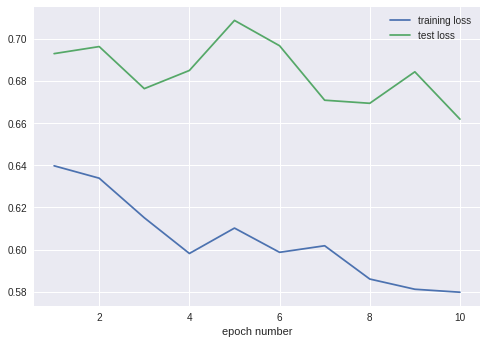

In [28]:
nb_epoch = len(model_data.history['loss'])
plt.plot(np.arange(1,nb_epoch+1),model_data.history['loss'],label='training loss')
plt.plot(np.arange(1,nb_epoch+1),model_data.history['val_loss'],label='test loss')
plt.xlabel('epoch number')
plt.legend()
